## Initialization and importing libraries

In [1]:
import pandas as pd
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from textblob import TextBlob

In [4]:
from wordcloud import WordCloud

# Getting data & creating DataFrame

In [5]:
tweets_df = pd.read_csv("twitter_sa.csv")

# Inspecting DataFrame

In [6]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
tweets_df.shape

(31962, 3)

In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [10]:
tweets_df["tweet"].head(20)

0      @user when a father is dysfunctional and is s...
1     @user @user thanks for #lyft credit i can't us...
2                                   bihday your majesty
3     #model   i love u take with u all the time in ...
4                factsguide: society now    #motivation
5     [2/2] huge fan fare and big talking before the...
6      @user camping tomorrow @user @user @user @use...
7     the next school year is the year for exams.ð...
8     we won!!! love the land!!! #allin #cavs #champ...
9      @user @user welcome here !  i'm   it's so #gr...
10     â #ireland consumer price index (mom) climb...
11    we are so selfish. #orlando #standwithorlando ...
12    i get to see my daddy today!!   #80days #getti...
13    @user #cnn calls #michigan middle school 'buil...
14    no comment!  in #australia   #opkillingbay #se...
15    ouch...junior is angryð#got7 #junior #yugyo...
16    i am thankful for having a paner. #thankful #p...
17                               retweet if you 

# Data pre-processing

In [11]:
tweets_df = tweets_df.drop(["id"], axis = 1)
display(tweets_df.head());
tweets_df.shape

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


(31962, 2)

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
import nltk

In [14]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

In [23]:
tweets_df['tweet']=tweets_df['tweet'].str.lower()
tweets_df['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

# Cleaning & removing the above stopwords

In [24]:
STOPWORDS = set(stopwords.words('english'))

In [25]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [26]:
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda text: cleaning_stopwords(text))
tweets_df['tweet'].head()

0    @user father dysfunctional selfish drags kids ...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u take u time urð±!!! ððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object

# Removing punctuation, numbers and special characters

In [32]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

In [34]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [35]:
tweets_df['tweet']= tweets_df['tweet'].apply(lambda x: cleaning_punctuations(x))
tweets_df['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause of...
2                                       bihday majesty
3    model love u take u time urð± ðððð...
4                        factsguide society motivation
Name: tweet, dtype: object

In [108]:
display(string.punctuation)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [109]:
stopwords.words("english")[:5]

['i', 'me', 'my', 'myself', 'we']

# Cleaning and removing repeating characters

In [36]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [37]:
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: cleaning_repeating_char(x))
tweets_df['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause of...
2                                       bihday majesty
3    model love u take u time urð± ðððð...
4                        factsguide society motivation
Name: tweet, dtype: object

# Cleaning and removing URL’s

In [38]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [41]:
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: cleaning_URLs(x))
tweets_df['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause of...
2                                       bihday majesty
3    model love u take u time urð± ðððð...
4                        factsguide society motivation
Name: tweet, dtype: object

# Cleaning and removing Numeric numbers

In [42]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)

In [43]:
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: cleaning_numbers(x))		
tweets_df['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause of...
2                                       bihday majesty
3    model love u take u time urð± ðððð...
4                        factsguide society motivation
Name: tweet, dtype: object

# Remove short words

In [44]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

In [46]:
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: transform_text(x))		
tweets_df['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause of...
2                                       bihday majesty
3    model love take time urð± ðððð ð...
4                        factsguide society motivation
Name: tweet, dtype: object

# Tokenization: to split the strings into a list of words

In [47]:
from nltk.tokenize import TweetTokenizer

In [48]:
tt = TweetTokenizer()

In [49]:
tweets_df['tweet'] = tweets_df['tweet'].apply(tt.tokenize)		
tweets_df['tweet'].head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3    [model, love, take, time, urð, , , ±, ð, , ...
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

# Applying Stemming

In [50]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [51]:
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: stemming_on_text(x))		
tweets_df['tweet'].head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3    [model, love, take, time, urð, , , ±, ð, , ...
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

# Applying Lemmatizer

In [52]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [53]:
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: lemmatizer_on_text(x))		
tweets_df['tweet'].head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3    [model, love, take, time, urð, , , ±, ð, , ...
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

# Subjectivity and polarity: Creating function to get the subjectivity

In [54]:
def getSubjectivity(text):
    text = ' '.join(text)					#Join the list of words into a single string using a space separator
    return TextBlob(text).sentiment.subjectivity

In [55]:
def getpolarity(text):						    # Join the list of words into a single string using a space separator
    text = ' '.join(text)				
    return TextBlob(text).sentiment.polarity

In [57]:
tweets_df['subjectivity']=tweets_df['tweet'].apply(getSubjectivity)		#create two new columns
tweets_df['polarity']=tweets_df['tweet'].apply(getpolarity)

In [58]:
tweets_df.head()

,label,tweet,subjectivity,polarity
0,0,"[user, father, dysfunctional, selfish, drags, ...",1.0,-0.5
1,0,"[user, user, thanks, lyft, credit, cant, use, ...",0.2,0.2
2,0,"[bihday, majesty]",0.0,0.0
3,0,"[model, love, take, time, urð, , , ±, ð, , ...",0.6,0.5
4,0,"[factsguide, society, motivation]",0.0,0.0


In [96]:
#Getting the length of every tweets 
tweets_df["length"] = tweets_df["tweet"].apply(len)
tweets_df.head()

,label,tweet,subjectivity,polarity,analysis,length
0,0,"[user, father, dysfunctional, selfish, drags, ...",1.0,-0.5,NEGATIVE,8
1,0,"[user, user, thanks, lyft, credit, cant, use, ...",0.2,0.2,POSITIVE,14
2,0,"[bihday, majesty]",0.0,0.0,NEUTRAL,2
3,0,"[model, love, take, time, urð, , , ±, ð, , ...",0.6,0.5,POSITIVE,35
4,0,"[factsguide, society, motivation]",0.0,0.0,NEUTRAL,3


In [123]:
display(string.punctuation)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [124]:
tweets_df_clean = tweets_df["tweet"].apply(cleaning)
print(tweets_df_clean[5])

['hugefanfarebigtalkingleavechaospaydisputesgetthereallshowandnogo']


In [125]:
#Shortest tweet
display(tweets_df[tweets_df["length"] == 11]["tweet"].iloc[0])

['won',
 'love',
 'land',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'â',
 '\x80',
 '¦']

In [60]:
def getAnalysis(score):
    if score<0:
        return 'NEGATIVE'
    elif score==0:
        return 'NEUTRAL'
    else:
        return 'POSITIVE'

In [61]:
tweets_df['analysis']=tweets_df['polarity'].apply(getAnalysis)
tweets_df.head()

,label,tweet,subjectivity,polarity,analysis
0,0,"[user, father, dysfunctional, selfish, drags, ...",1.0,-0.5,NEGATIVE
1,0,"[user, user, thanks, lyft, credit, cant, use, ...",0.2,0.2,POSITIVE
2,0,"[bihday, majesty]",0.0,0.0,NEUTRAL
3,0,"[model, love, take, time, urð, , , ±, ð, , ...",0.6,0.5,POSITIVE
4,0,"[factsguide, society, motivation]",0.0,0.0,NEUTRAL


In [65]:
tweets_df_positive = tweets_df[tweets_df['analysis'] == 'POSITIVE']		#Create two new dataframe all of the positive text

In [66]:
tweets_df_negative = tweets_df[tweets_df['analysis'] == 'NEGATIVE']		#Create two new dataframe all of the negative text

In [67]:
tweets_df_neutral = tweets_df[tweets_df['analysis'] == 'NEUTRAL']		#Create two new dataframe all of the neutral text

In [68]:
tb_counts = tweets_df.analysis.value_counts()					#Count the number of positive, negative, neutral reviews.
tb_counts

analysis
POSITIVE    15241
NEUTRAL     12120
NEGATIVE     4601
Name: count, dtype: int64

# DATA EXPLORATION

In [71]:
all_words = " ".join(" ".join(sent) for sent in tweets_df['tweet'])		#Visualizing all tweets

In [72]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

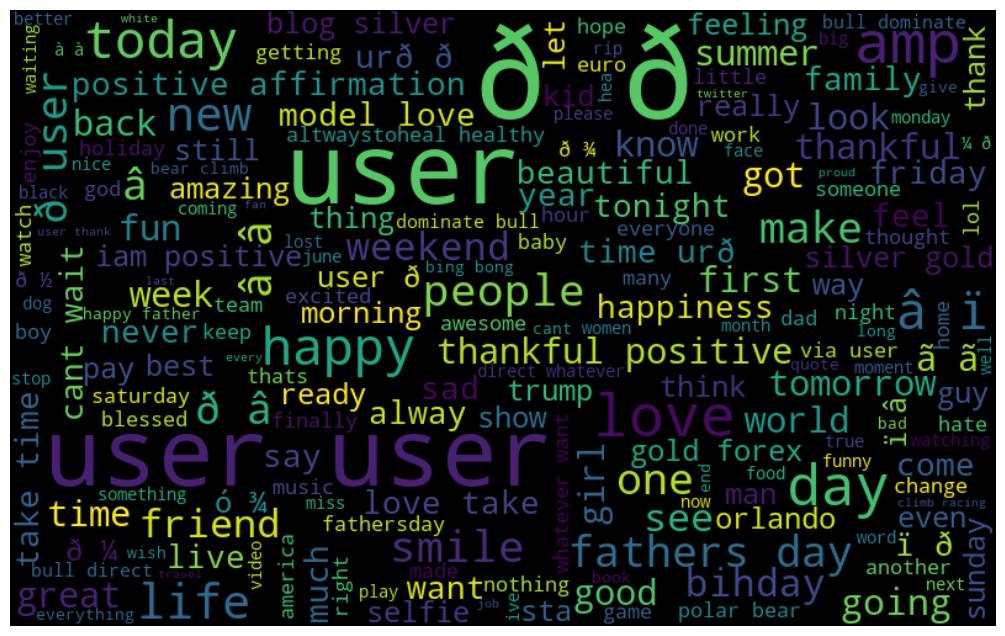

In [73]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Positive tweets visualization

In [74]:
all_pos_words = " ".join(" ".join(sent) for sent in tweets_df_positive['tweet'])

In [75]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_pos_words)

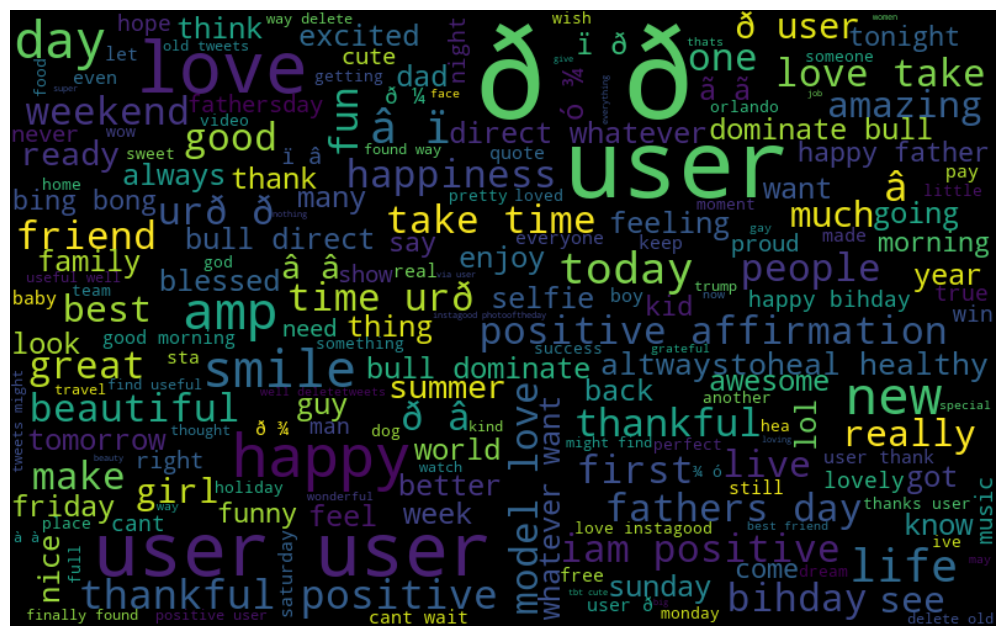

In [76]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative tweets visualization

In [77]:
all_neg_words = " ".join(" ".join(sent) for sent in tweets_df_negative['tweet'])

In [78]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neg_words)

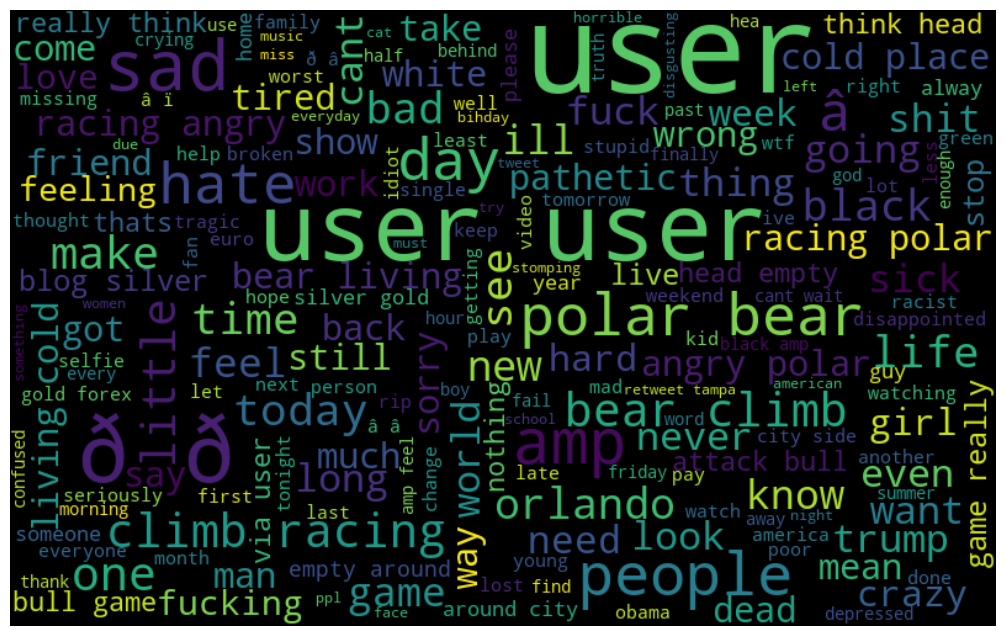

In [79]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Neutral tweets visualization

In [80]:
all_neu_words = " ".join(" ".join(sent) for sent in tweets_df_neutral['tweet'])

In [81]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neu_words)

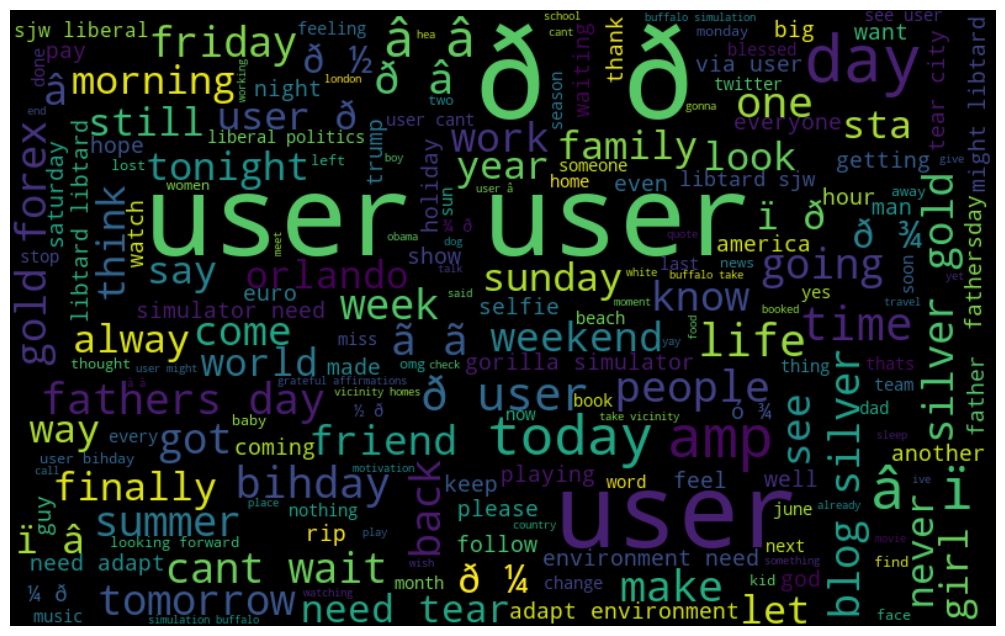

In [82]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plotting polarity & subjectivity

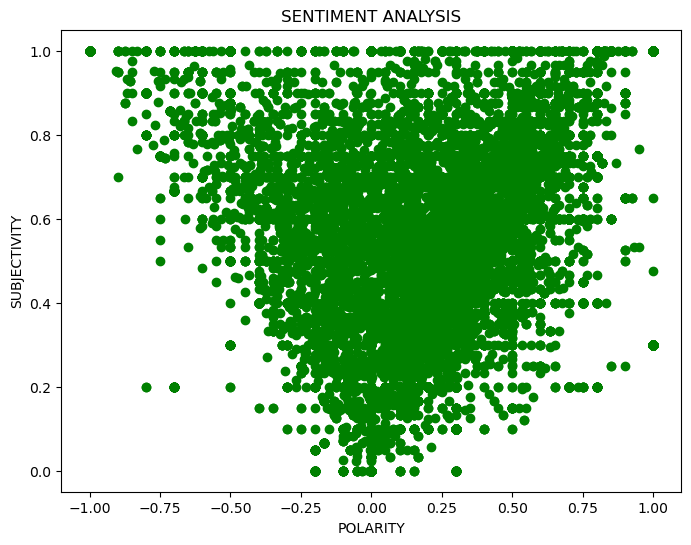

In [133]:
plt.figure(figsize=(8,6))
plt.scatter(tweets_df['polarity'], tweets_df['subjectivity'], color='green')
plt.title('SENTIMENT ANALYSIS')
plt.xlabel('POLARITY')
plt.ylabel('SUBJECTIVITY')
plt.show()

In [84]:
print("Positive tweets",round((tweets_df_positive.shape[0]/tweets_df.shape[0])*100,1),"%")	#Getting the percentage of positive tweets

Positive tweets 47.7 %


In [85]:
print("Negative tweets",round((tweets_df_negative.shape[0]/tweets_df.shape[0])*100,1),"%")	#Getting the percentage of negative tweets

Negative tweets 14.4 %


In [86]:
print("Neutral tweets",round((tweets_df_neutral.shape[0]/tweets_df.shape[0])*100,1),"%")	#Getting the percentage of neutral tweets

Neutral tweets 37.9 %


In [87]:
#Value counts:
tweets_df['analysis'].value_counts()

analysis
POSITIVE    15241
NEUTRAL     12120
NEGATIVE     4601
Name: count, dtype: int64

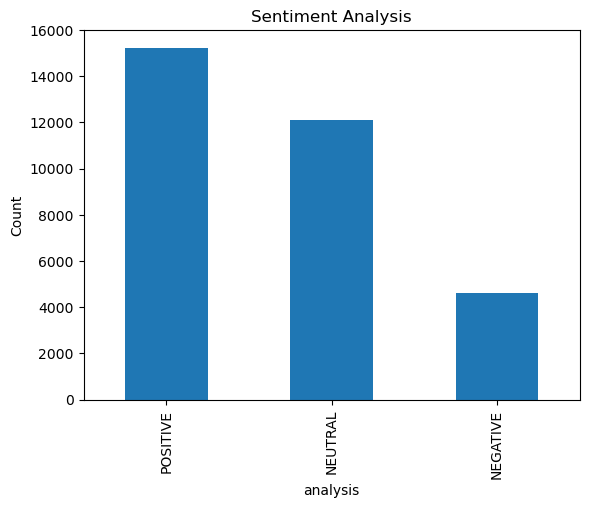

In [89]:
#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweets_df['analysis'].value_counts().plot(kind='bar')
plt.show()

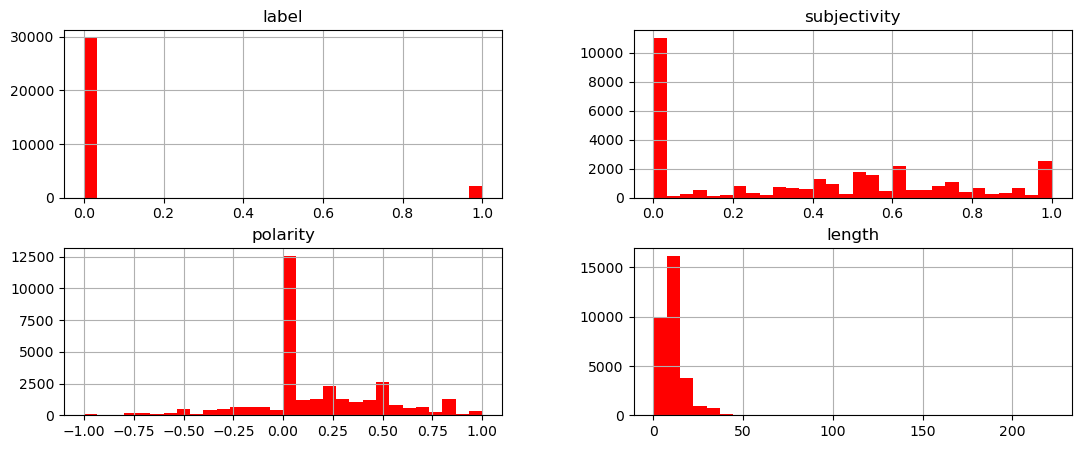

In [134]:
#Creating the Histograms of DataFrame
tweets_df.hist(bins=30, figsize=(13, 5), color = "r")
plt.show()

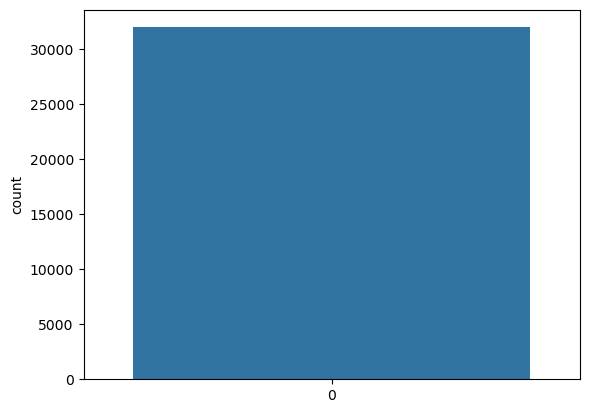

In [94]:
#Plotting the countplot of the label column using seaborn
sns.countplot(tweets_df["label"], label="Cont")
plt.show()

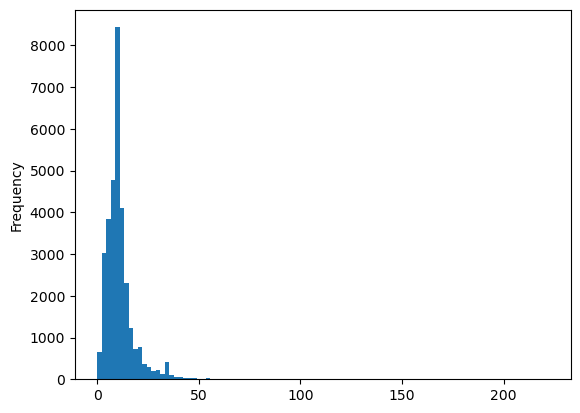

In [98]:
#Plotting the length column
tweets_df["length"].plot(bins = 100, kind = "hist")
plt.show()

# Practising the functions used

In [126]:
txt = "Hi Sam!"
x = "mSa"
y = "eJo"
mytable = str.maketrans(x, y)
print(txt.translate(mytable))

Hi Joe!


In [127]:
txt = "Good night Sam!"
x = "mSa"
y = "eJo"
z = "odnght"
mytable = str.maketrans(x, y, z)
print(txt.translate(mytable))

G i Joe!


In [128]:
txt = "Good night Sam!"
x = "mSa"
y = "eJo"
z = "odnght"
print(str.maketrans(x, y, z))

{109: 101, 83: 74, 97: 111, 111: None, 100: None, 110: None, 103: None, 104: None, 116: None}


In [129]:
myTuple = ("John", "Peter", "Vicky")

x = "#".join(myTuple)

print(x)

John#Peter#Vicky


In [130]:
txt = "welcome to the jungle"

x = txt.split()

print(x)

['welcome', 'to', 'the', 'jungle']


In [131]:
tweets_df["length"] = tweets_df["tweet"].apply(len)
tweets_df.head()

,label,tweet,subjectivity,polarity,analysis,length
0,0,"[user, father, dysfunctional, selfish, drags, ...",1.0,-0.5,NEGATIVE,8
1,0,"[user, user, thanks, lyft, credit, cant, use, ...",0.2,0.2,POSITIVE,14
2,0,"[bihday, majesty]",0.0,0.0,NEUTRAL,2
3,0,"[model, love, take, time, urð, , , ±, ð, , ...",0.6,0.5,POSITIVE,35
4,0,"[factsguide, society, motivation]",0.0,0.0,NEUTRAL,3


In [132]:
display(tweets_df[tweets_df["length"] == 11]["tweet"].iloc[0])

['won',
 'love',
 'land',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'â',
 '\x80',
 '¦']